In [43]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from spectral import *
import spectral.io.envi as envi

In [44]:
data_ref = envi.open('10a_101012-120551_refl_ss.hdr', '10a_101012-120551_refl_ss.dat')
data = np.array(data_ref.load())
print (data.shape) # wavelength1043-2486 nm in 230 bands

(285, 200, 230)


ImageView object:
  Display bands       :  (0, 200, 220)
  Interpolation       :  <default>
  RGB data limits     :
    R: [0.0, 0.5314581394195557]
    G: [0.0, 0.561603307723999]
    B: [0.0, 0.4880259037017822]

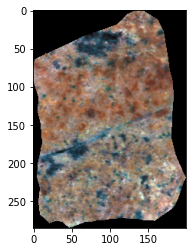

In [45]:
imshow(data, (0, 200, 220)) 

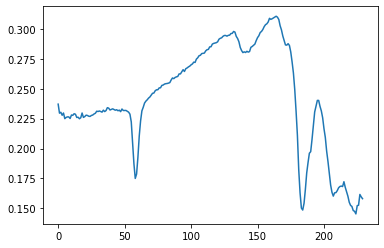

In [46]:
spectrum = data[100,100,:]
plt.plot(spectrum)
plt.show()

In [47]:
pixels = data.reshape((57000, 230))
print (pixels.shape)

(57000, 230)


In [48]:
imagedf=pd.DataFrame(pixels)

## Mineral Mapping using KMEANS

In [49]:
from sklearn.cluster import KMeans

In [56]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(imagedf)
imagedf['minerals'] = kmeans.labels_

In [57]:
imagenpy=imagedf.to_numpy()
print (imagenpy.shape)

(57000, 231)


In [58]:
classified=imagenpy.reshape(285, 200, 231)

In [59]:
image=classified[:, :, 230]

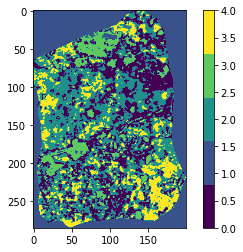

In [66]:
plt.imshow(image, cmap=plt.cm.get_cmap('viridis',5))
plt.colorbar()

## Mineral Mapping using PCA

In [83]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
test=pca.fit_transform(imagedf)

In [84]:
print (test.shape)

(57000, 5)


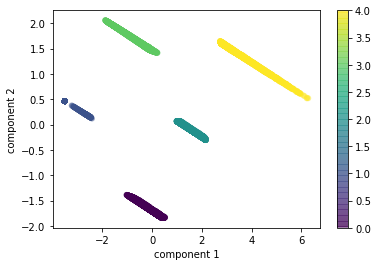

In [93]:
plt.scatter(test[:, 0], test[:, 1], edgecolor='none', alpha=0.5, c=imagedf['minerals'],
            cmap=plt.cm.get_cmap('viridis'))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

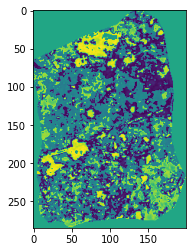

In [73]:
PCAclass=test.reshape(285, 200, 5)
imagePCA=PCAclass[:, :, 1]
plt.imshow(imagePCA, cmap=plt.cm.get_cmap('viridis'))

In [92]:
print (imagedf.shape)

(57000, 231)
